# Load Data

In [17]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/liveproject/mortgage_data_balanced.pkl.gz")

# Deliverable 1: Frequency and charts

In [19]:
df["applicant_ethnicity_name"].value_counts()/df.shape[0] * 100.0

Not Hispanic or Latino    93.284122
Hispanic or Latino         6.715878
Name: applicant_ethnicity_name, dtype: float64

In [20]:
df["applicant_race_name_1"].value_counts()/df.shape[0] * 100.0

White                                        85.706538
Black or African American                     7.668575
Asian                                         5.495029
American Indian or Alaska Native              0.738174
Native Hawaiian or Other Pacific Islander     0.391684
Name: applicant_race_name_1, dtype: float64

In [21]:
df["applicant_sex_name"].value_counts()/df.shape[0] * 100.0

Male      69.446219
Female    30.553781
Name: applicant_sex_name, dtype: float64

In [22]:
df["action_taken_name"].value_counts()/df.shape[0] * 100.0

Loan originated                                57.208195
Application denied by financial institution    42.791805
Name: action_taken_name, dtype: float64

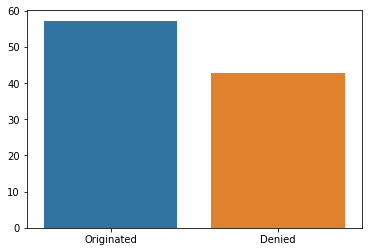

In [23]:
import seaborn as sns
d = {"Mortgage": ["Originated", "Denied"],
     "Freq": (df["action_taken_name"].value_counts()/df.shape[0] * 100.0).values}
sns.barplot(data=d, y="Freq", x="Mortgage")

#Deliverable 2: Histograms

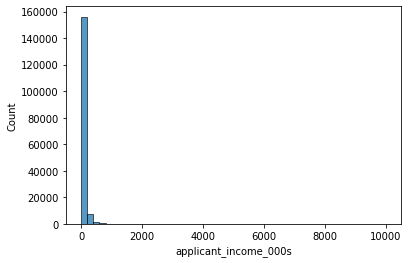

In [24]:
sns.histplot(data=df, x="applicant_income_000s", bins=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


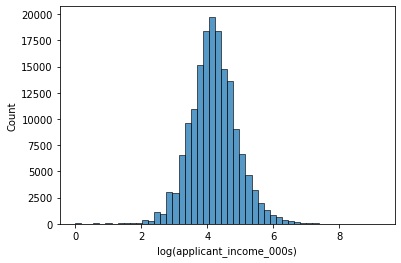

In [25]:
df["log(applicant_income_000s)"] = pd.np.log(df["applicant_income_000s"].copy())
sns.histplot(data=df, x="log(applicant_income_000s)", bins=50)

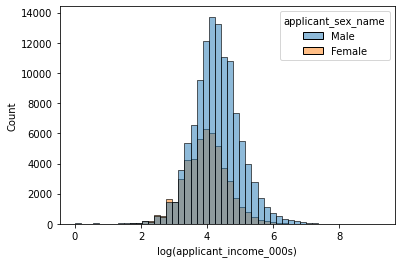

In [26]:
sns.histplot(data=df, x="log(applicant_income_000s)", hue="applicant_sex_name", bins=50)

#Deliverable 3: Contingency table and charts

In [27]:
pd.crosstab(df["applicant_ethnicity_name"], df["action_taken_name"])/df.shape[0] * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_ethnicity_name,,
Hispanic or Latino,4.066285,2.649593
Not Hispanic or Latino,38.725520,54.558602


In [28]:
pd.crosstab(df["applicant_race_name_1"], df["action_taken_name"])/df.shape[0] * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_race_name_1,,
American Indian or Alaska Native,0.476650,0.261525
Asian,1.927086,3.567942
Black or African American,5.504670,2.163905
Native Hawaiian or Other Pacific Islander,0.219343,0.172341
White,34.664055,51.042483


In [29]:
pd.crosstab(df["applicant_sex_name"], df["action_taken_name"])/df.shape[0] * 100.0

action_taken_name,Application denied by financial institution,Loan originated
applicant_sex_name,,
Female,15.658933,14.894848
Male,27.132871,42.313347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


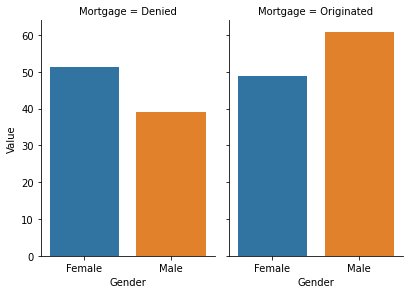

In [30]:
d = pd.crosstab(df["applicant_sex_name"], df["action_taken_name"])

c=pd.DataFrame({'Gender': ['Female', 'Female', 'Male', 'Male'],
                'Mortgage': ['Denied', 'Originated', 'Denied', 'Originated'],
                'Value': pd.np.array([d.iloc[0][0]/(d.iloc[0][0] + d.iloc[0][1]), d.iloc[0][1]/(d.iloc[0][0] + d.iloc[0][1]), 
                                      d.iloc[1][0]/(d.iloc[1][0] + d.iloc[1][1]), d.iloc[1][1]/(d.iloc[1][0] + d.iloc[1][1])]) * 100.0})

g = sns.catplot(data=c, x='Gender', y='Value', col='Mortgage', kind="bar", height=4, aspect=.7)